## Práctica Guiada Web Scraping con Regular Expressions

Las Regular Expressions son una forma muy flexible de realizar búsquedas dentro de textos, por lo que suele ser muy útil para extraer información de páginas web. 

#### Ejemplo 1:
    Usamos regex para extraer los títulos del diario La Prensa.


In [1]:
#Importamos las librerias necesarias

import requests
import re

In [2]:
url = 'http://www.laprensa.com.ar/'

head = {'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) '
           'Chrome/59.0.3071.115 Safari/537.36'}

resp = requests.get(url, headers = head)

El objeto resp es propio de Response, y tiene distintos atributos a los que podemos acceder.

In [3]:
#Vemos el código de estado
resp.status_code

200

In [5]:
#Vemos los headers que enviamos
resp.request.headers

{'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.115 Safari/537.36', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

### Los que nos interesan particularmente son resp.text y resp.content, que guardan el contenido de la página como string o como bytes respectivamente 

Para utilizar Regex en Python, usamos el módulo re. Las siguientes funciones nos proporcionan la mayor parte de la funcionalidad necesaria:

    - re.findall(pattern, string) 
    Busca dentro de string utilizando pattern, devolviendo una lista con todos los resultados.
    - re.search(pattern, string)
    Busca la primera coincidencia con pattern dentro de string.
    - re.sub(pattern, replace, string)
    Reemplaza lo que coincida con pattern por replace, dentro de string.

In [6]:
#Usamos el navegador para identificar la estructura de los datos que queremos extraer y creamos el patrón de búsqueda
pattern = 'class="title".+?>(.+?)<'

In [7]:
#Usamos findall para encontrar todas las coincidencias
titles = [m for m in re.findall(pattern, resp.text)]

In [8]:
titles

['El Colegio Nacional Buenos Aires apartó al alumno acusado de abuso',
 'El ministro de Educación cruzó al rector del Buenos Aires tras la denuncia de abuso',
 'Vidal recorrió La Matanza junto a "Toty" Flores y cuestionó el camino de las "recetas mágicas"',
 'Investigación con sabor a grieta',
 'Para Randazzo, las declaraciones de Cristina sobre la tragedia de Once fueron "desafortunadas e imprudentes" ',
 'El fiscal Delgado dijo que Cristina  "consagra la impunidad de un montón de gente"',
 'Broccolini, nueva hortaliza en la mira de los gourmets',
 'Un plan con supuestos heroicos',
 '"Creemos que el PBI este año crecerá más del 3%"',
 'Señales mixtas no frenan por ahora el crecimiento global',
 'Una dieta contra la epilepsia ',
 'Realizarán una campaña gratuita de detección de cataratas',
 'Agobiante corrección política',
 'Odisea en el "Londres de Abajo"',
 'Anomalías de una larga espera',
 'Macri: "Hemos logrado rescatar de la pobreza a más de 600.000 argentinos"',
 'El Pata Medina,

### Ejercicio 2: 

Descargamos imagenes de Google Images, y las mostramos.

In [9]:
#Vamos a necesitar lo siguiente
import matplotlib.pyplot as plt
import codecs
from PIL import Image
from io import BytesIO

In [10]:
query = 'DigitalHouse'

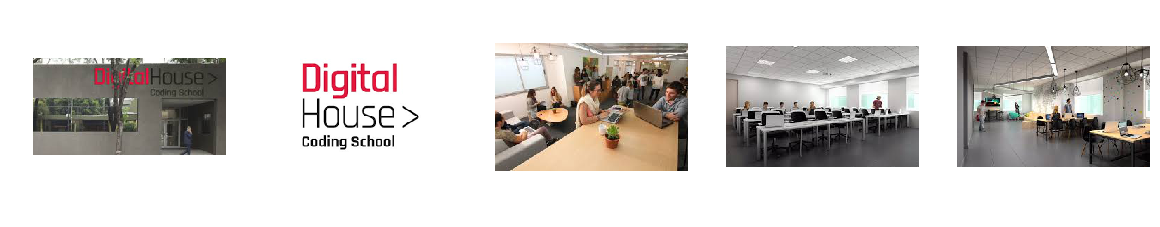

In [11]:
#La query se inserta en la URL

url = 'https://www.google.com.ar/search?q={0}&source=lnms&tbm=isch'.format(query)

search = requests.get(url, headers = head)

imgs = re.findall(b'base64,(.+?)[)"]', search.content)

q = 5

fig = plt.figure(figsize = (20,20))

for i in range(q):

    a = fig.add_subplot(1,q,i+1)
    img_bs64 = imgs[5 + i]
    img_by = codecs.decode(img_bs64, 'base64')
    buf = BytesIO(img_by)
    img = Image.open(buf)
    plt.imshow(img)
    plt.axis('off')
    
    #Si quisieramos guardarlas
    
    #with open(filename + '.png', 'w') as out:
    #   out.write(img_by)
    
plt.show()